# Importing needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing

# Table of contents

### 1. [Importing Data 📥](#importing)

### 2. [Data visualization & EDA 📈](#eda)
    
- **[Definitions of functions ⌨️](#functions)**
    
- **[Numeric Variables Distribution 🔢](#numeric)**
    
- **[Categorical Variables Distibution 📊](#categorical)**
    
- **[Correlation with "Results"🔍](#correlation)**
    
### 3. [Models and predictions🤖](#modelling)

- **[Searching for the model💻](#model-search)**
    
- **[Importance of features🧐](#features-importance)**
    
- **[Features Selection⬇️](#features-selection)**

<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <h2 style="text-align:left; color:#342E37">About Dataset</h2>
</div>

---

<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">Gender</mark> : 0 - male, 1 - female

---

<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">Hemoglobin</mark>: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs

---
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">MCH</mark>: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called hemoglobin, which carries oxygen around your body.

---
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">MCHC</mark>: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin inside a single red blood cell.

---
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">MCV</mark>: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.

---
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">Results</mark>: 0- not anemic, 1-anemic

### **What is Anemia?**
Anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak.

There are many forms of anemia, each with its own cause. Anemia can be temporary or long term and can range from mild to severe. In most cases, anemia has more than one cause. See your doctor if you suspect that you have anemia. It can be a warning sign of serious illness.


<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <a id="importing"><h2 style="text-align:left; color:#342E37">Importing Data & Libraries 📥</h2></a>
</div>


In [ ]:
# Data import
df = pd.read_csv("/content/anemia.csv")

print(f"Shape of dataset -> {df.shape}")
print(df.info())

df.head()

Shape of dataset -> (1421, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [ ]:
df.isnull().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <a id="eda"><h2 style="text-align:left; color:#342E37">Data visualization & EDA 📈</h2></a>
</div>


<a id="functions"><b style="font-size:1.2em">Definitions of functions  to display the distribution of variables and to compare them by categories. ⌨️</b><a>

In [ ]:
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

In [ ]:
# orange, dark blue, light blue
colors = ["#fca311", "#14213d", "#00b4d8"]

<div>
<div style="float:left; width:33.3%; background-color:#fca311; height:50px; border-radius:0.5em 0 0 0.5em"></div>
<div style="float:left; width:33.3%; background-color:#14213d; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#00b4d8; height:50px; border-radius:0 0.5em 0.5em 0"></div>
</div>

In [ ]:
def hist(df, x, ax, hue=None, palette=None, main_color=colors[0], second_color=colors[1]):

    alpha = 0.8
    if hue:
        alpha = 0.3

    sns.histplot(data=df, x=x, ax=ax,
                 hue=hue, palette=palette,
                 color=main_color, linewidth=3, bins=20, alpha=alpha,
                 kde=True, line_kws={"linewidth":3, "linestyle":"--"}
                )
    ax.lines[0].set_color(second_color)

    ax.set_ylabel("Number of observation")
    ax.set_xlabel(x, fontsize="x-large")

    set_style(ax)


**CDF** graphs allow us to easily compare multiple distributions

In [ ]:
def cdf_plot(df, x, ax, hue=None, palette=None, main_color=colors[1]):

    sns.kdeplot(data=df, x=x, hue=hue, ax=ax, color=main_color,
                palette=palette,
                cumulative=True, warn_singular=False, linewidth=4, common_norm=False)

    set_style(ax)

In [ ]:
def count(df, x, ax, main_color=colors[0], hue=None, palette=None):

    sns.countplot(data=df, x=x, ax=ax,
                  color=main_color, saturation=0.8, linewidth=3, edgecolor="black",
                  hue=hue, palette=palette)

    for container in ax.containers:
        ax.bar_label(container, color="black", fontsize=20)

    ax.set_ylabel("")
    ax.set_xlabel(x, fontsize=15)
    ax.tick_params(axis='y', which='both', left=False, right=False)


    set_style(ax)

<a id="numeric"><b style="font-size:1.2em">Numeric Variables Distribution 🔢</b><a>

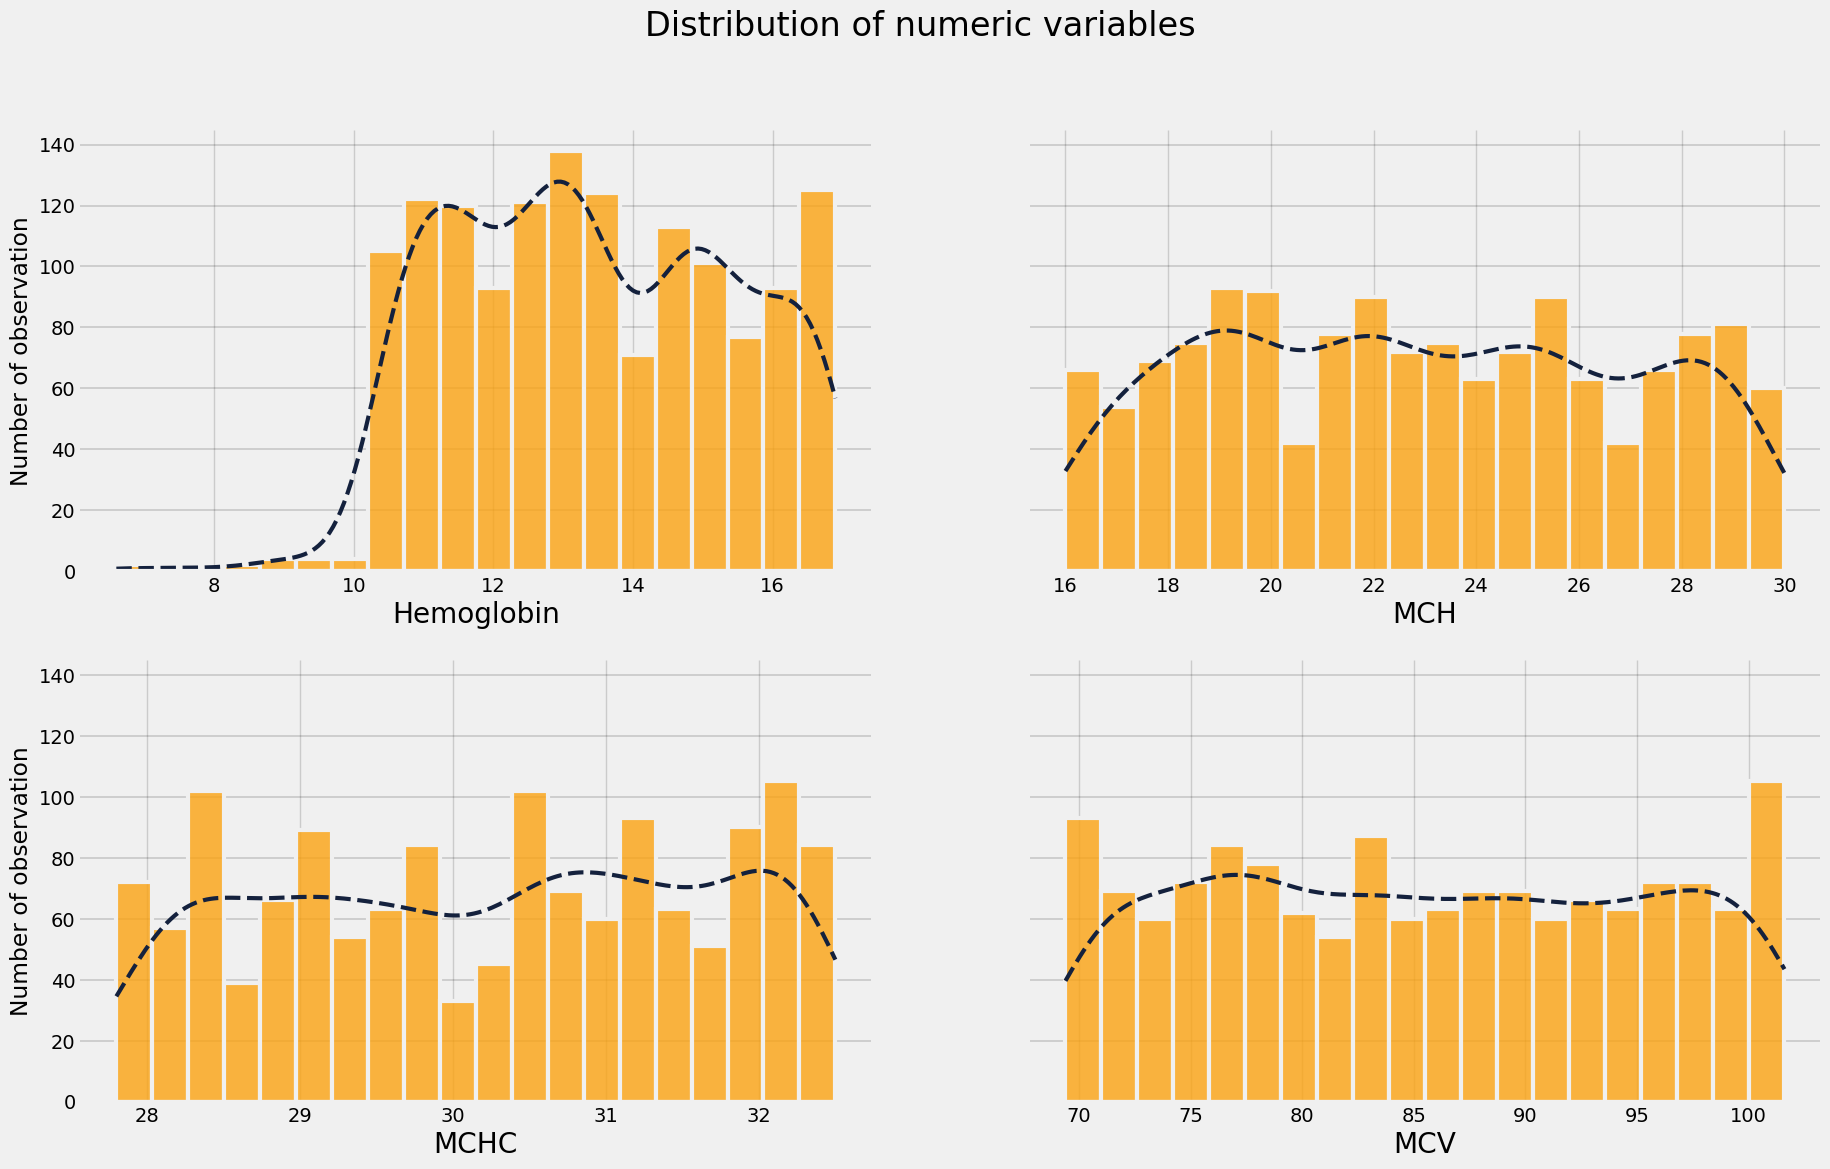

In [ ]:
numeric_cols = [col for col in df.columns if df[col].dtype == float]

fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]

    hist(df, col, ax)

fig.suptitle("Distribution of numeric variables", fontsize="xx-large")

plt.show()

Among the numerical columns we can see that:

1. "**Hemoglobin**" has a distribution of the right-skewed type. A modicum of knowledge regarding anemia tells us that it is a typical characteristic of sufferers to have low hemoglobin, so this distribution is not surprising.


2. All other columns have a uniform distribution. We will go on later to see if the categories show differences in these features.

<a id="categorical"><b style="font-size:1.2em">Categorical Variables Distribution 📊</b><a>

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == int]

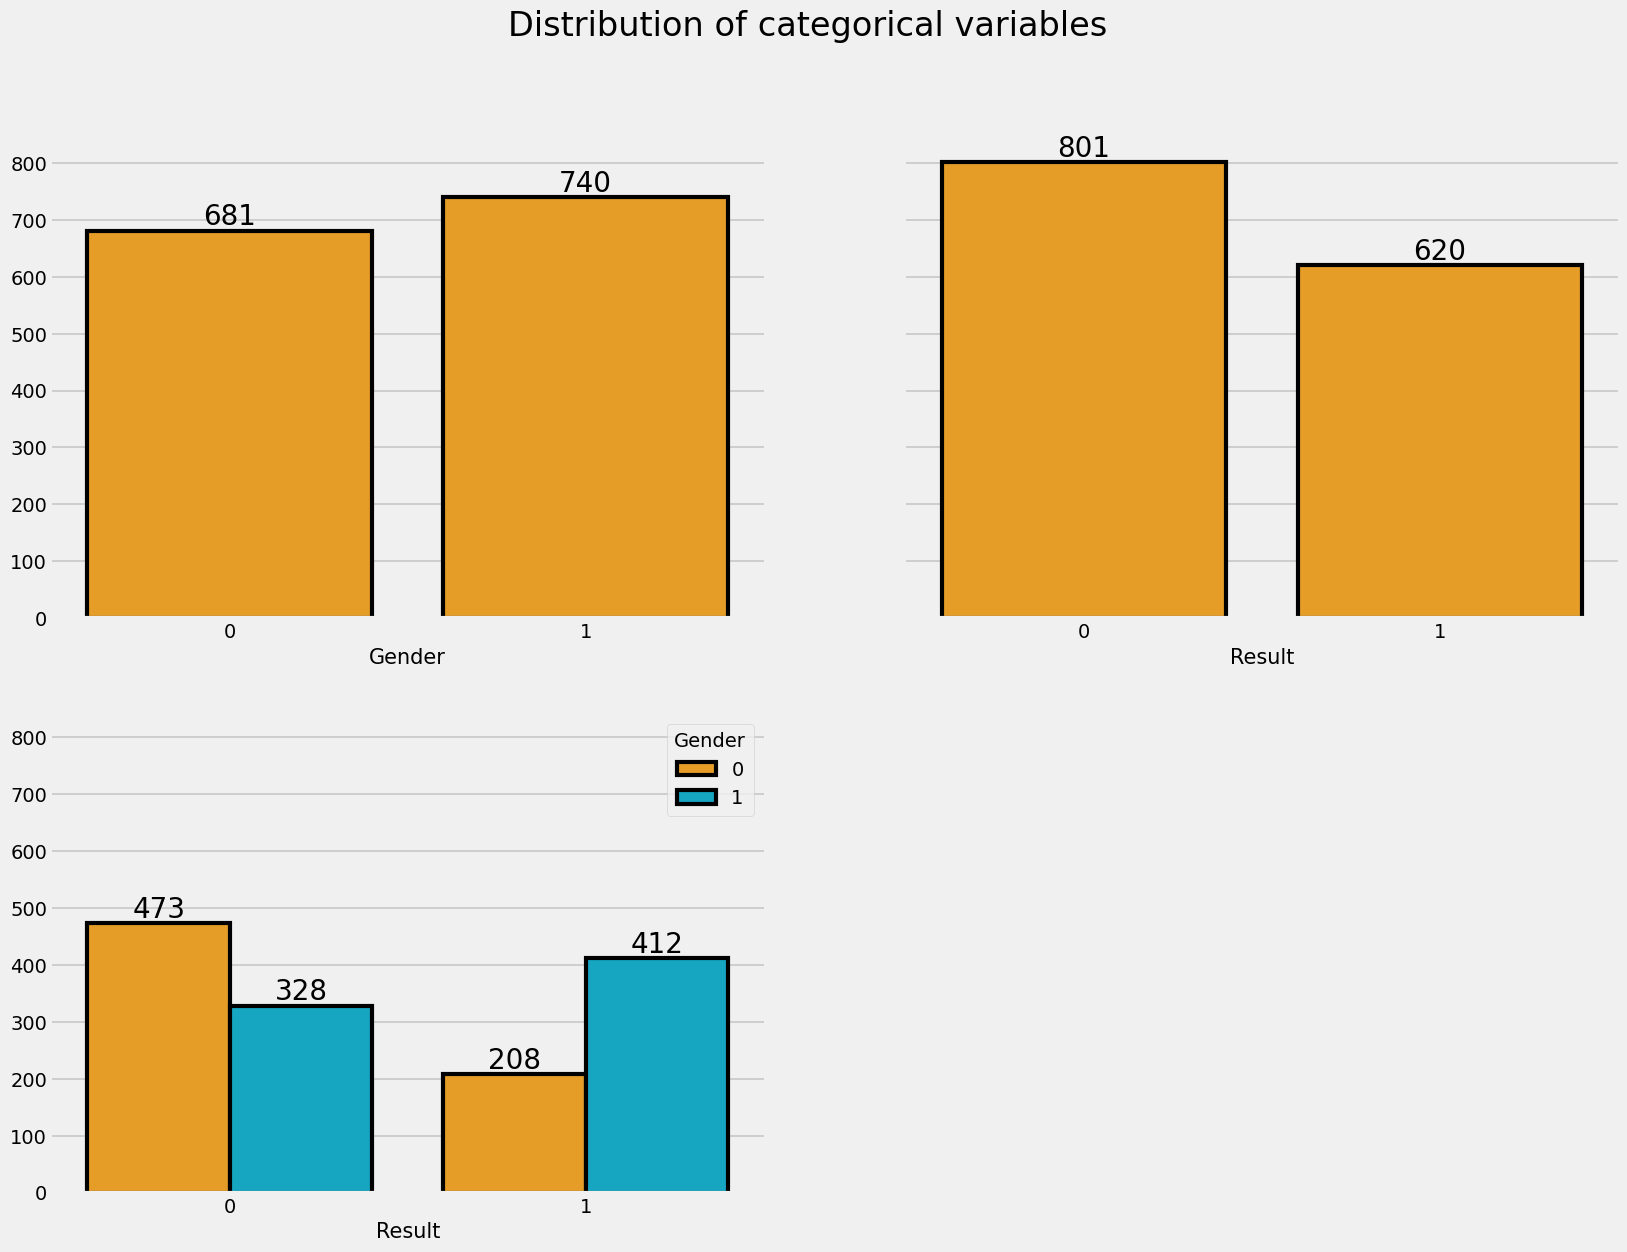

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 13), sharey=True)

for i, col in enumerate(cat_cols):
    count(df, col, axs[0][i])

count(df, "Result", axs[1][0], hue="Gender",palette=[colors[0], colors[2]])

fig.delaxes(axs[1,1])
fig.suptitle("Distribution of categorical variables", fontsize="xx-large")

plt.show()

Categorical variables are well distributed in the dataset, without excessive imbalance.

<a id="correlation"><b style="font-size:1.2em">Correlation with "Results"🔍</b><a>

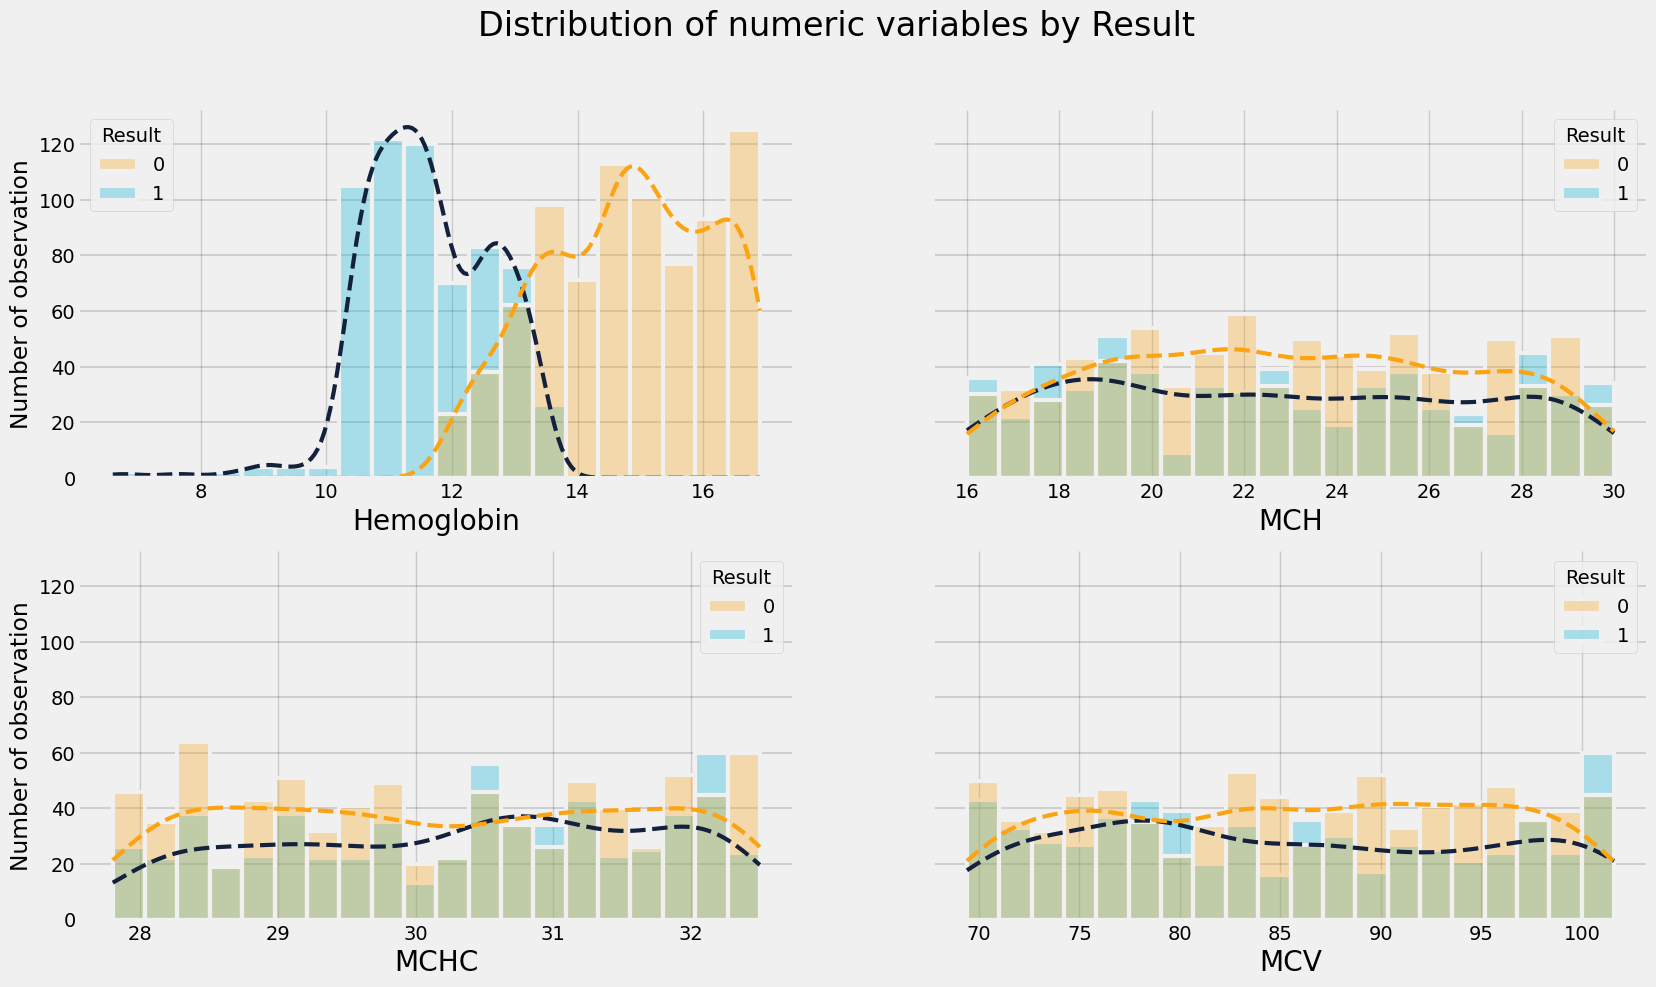

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]

    hist(df, col, ax, hue="Result", palette=[colors[0], colors[2]])

fig.suptitle("Distribution of numeric variables by Result", fontsize="xx-large")

plt.show()

We can see that there is a marked difference in hemoglobin values for patients with anemia compared with those without it. The other variables show no difference for these categories.



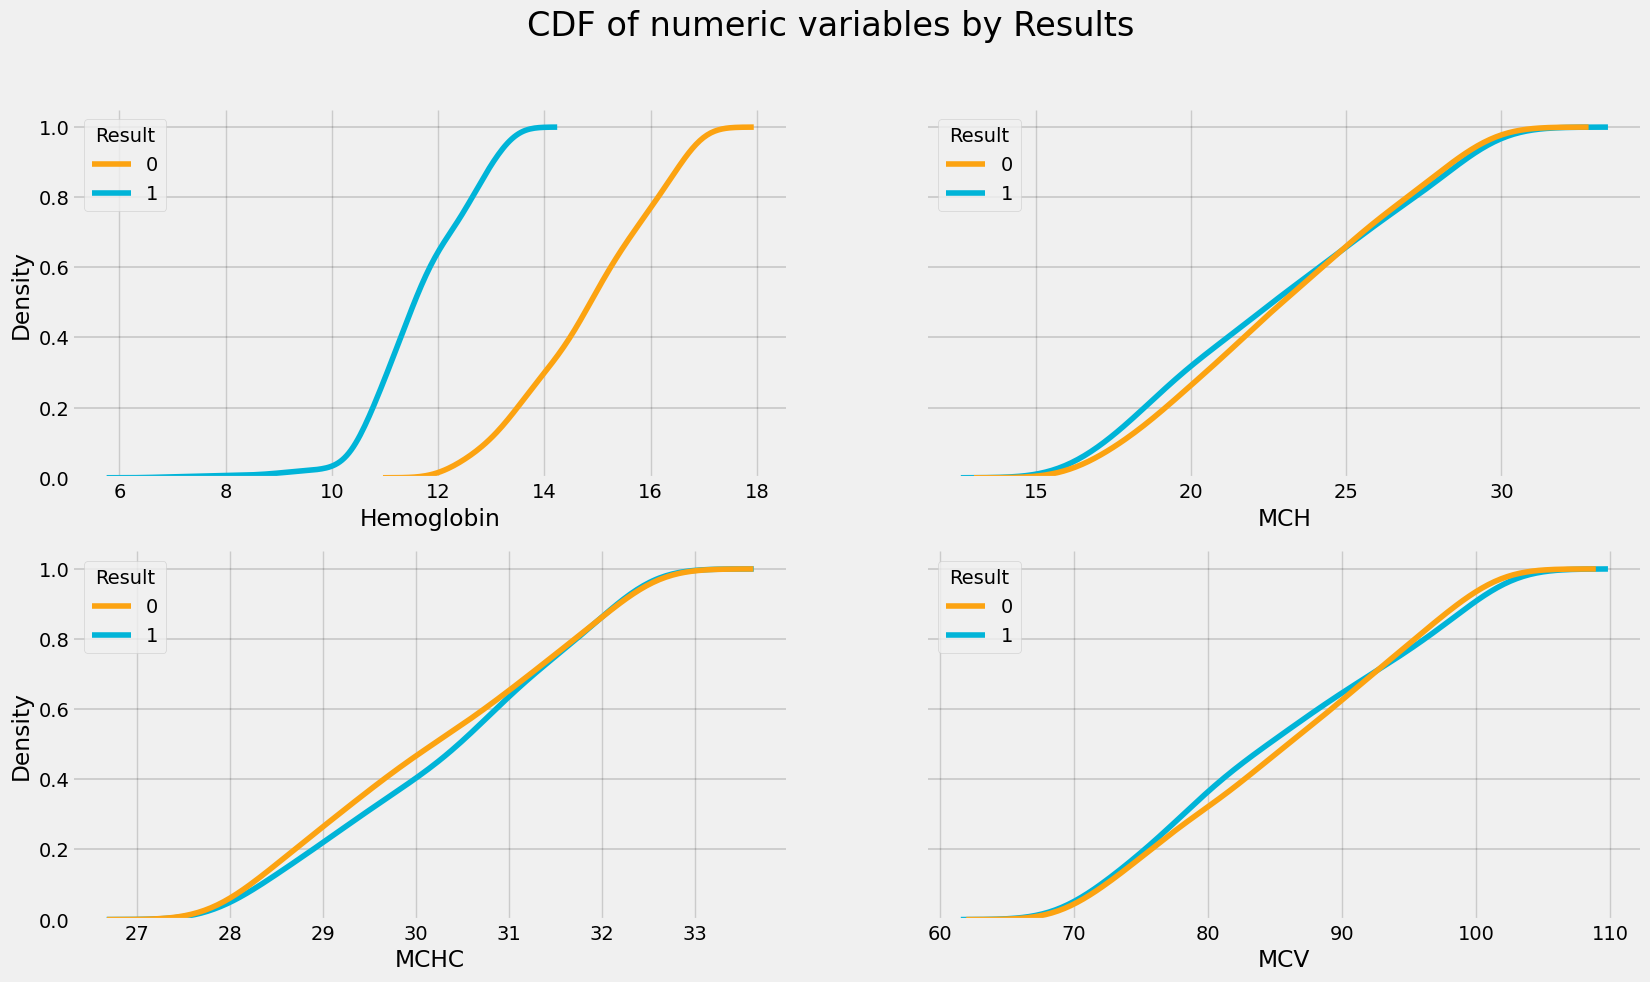

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]

    cdf_plot(df, col, ax, hue="Result", palette=[colors[0], colors[2]])

fig.suptitle("CDF of numeric variables by Results", fontsize="xx-large")

plt.show()

And are there strong differences for gender?

Let us compare these categories with another cdf

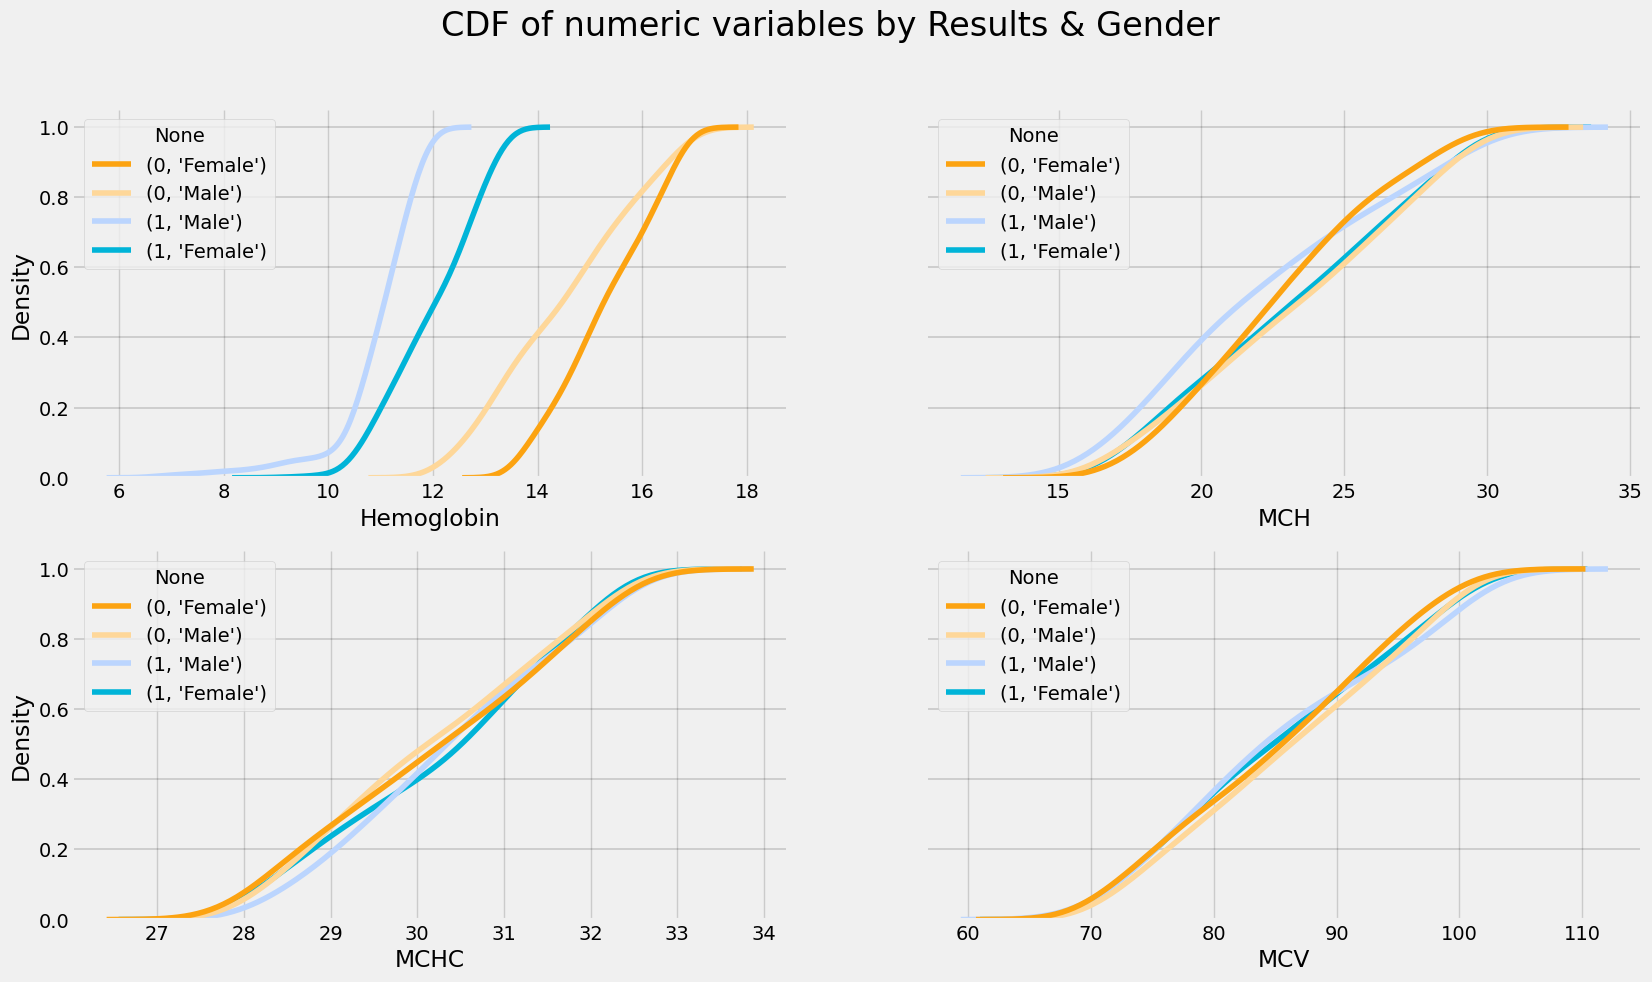

In [ ]:
df["Gender_str"] = df["Gender"].map({
    0: "Male",
    1: "Female"
})

fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]

    cdf_plot(df, col, ax, hue=df[['Result', 'Gender_str']].apply(tuple, axis=1),
             palette=[colors[0], "#FED799", "#BBD5FE", colors[2]])

fig.suptitle("CDF of numeric variables by Results & Gender", fontsize="xx-large")

plt.show()

df.drop("Gender_str", axis=1, inplace=True)

Men tend to have lower hemoglobin values, both healthy and with anemia. This will help in our model to make more accurate predictions.

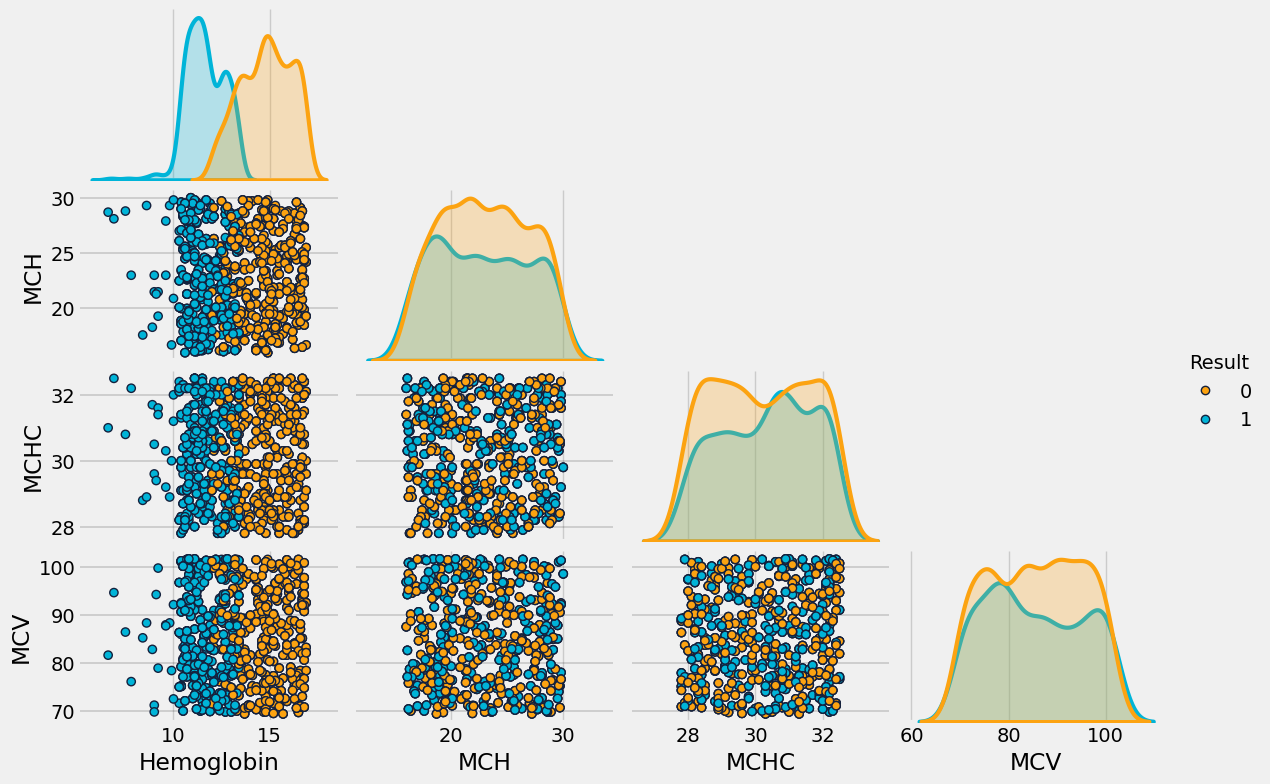

In [ ]:
g = sns.pairplot(data=df.drop("Gender", axis=1), hue="Result", palette=[colors[0], colors[2]],
             corner=True, plot_kws={"linewidth":1, "edgecolor":colors[1]},
             diag_kws={"linewidth":3},
             height=2, aspect=1.5)
for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)

fig.suptitle("Correlation between numeric variables by Results", fontsize="xx-large")

plt.show()

Such a pairplot shows that there is no kind of relationship between "Result" and numerical variables other than "Hemoglobin."

<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <a id="modelling"><h2 style="text-align:left; color:#342E37">Models and Predictions 🔮</h2></a>
</div>


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
X = df.drop("Result", axis=1)
y = df["Result"]

SEED = 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

<a id="model-search"><b style="font-size:1.2em">Searching for the model 💻</b><a>

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(random_state=SEED),
    "Knn": KNeighborsClassifier(),
    "S.V.C.": SVC(random_state=SEED),
    "RandomForestClassifier": RandomForestClassifier(random_state=SEED)
}

In [ ]:
for name in models.keys():
    model = models[name]

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    auc_train = roc_auc_score(y_train, y_pred_train)
    auc_test = roc_auc_score(y_test, y_pred_test)

    print("--"*10, f" {name} ", "--"*10)
    print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
    print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  LogisticRegression  --------------------

Accuracy score: 	Train: 0.99 	Test: 0.99

AUC score: 		Train: 0.99 	Test: 0.99

--------------------  Knn  --------------------

Accuracy score: 	Train: 0.94 	Test: 0.89

AUC score: 		Train: 0.94 	Test: 0.89

--------------------  S.V.C.  --------------------

Accuracy score: 	Train: 0.91 	Test: 0.9

AUC score: 		Train: 0.91 	Test: 0.9

--------------------  RandomForestClassifier  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0



Wow! With a random forest, without any kind of hyperparameter optimization, we scored maximum accuracy! This highlights the high quality of the data.

<a id="features-importance"><b style="font-size:1.2em">Importance of features🧐</b><a>

Let's go on to see, for the model that scored best, what are and in what proportion are the most important variables for prediction.

In [ ]:
model = RandomForestClassifier(random_state=SEED)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

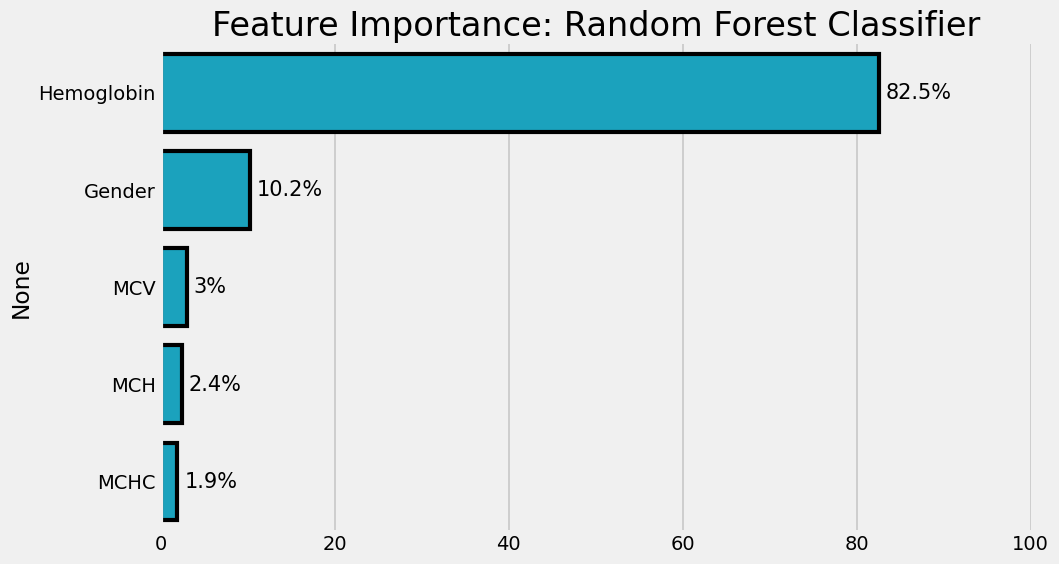

In [ ]:
feature_importance = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False) * 100

feature_importance = feature_importance.round(1)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y=feature_importance.index, x=feature_importance.values, ax=ax, color=colors[2], linewidth=3, edgecolor="black")
ax.bar_label(ax.containers[0], color="black", fontsize=15, padding=5, fmt='%g%%')

set_style(ax, left=False, bottom=True, axis_grid="x")

ax.set_title("Feature Importance: Random Forest Classifier", fontsize="xx-large")
ax.set_xlim([0, 100])

plt.show()

As was easy to predict, the feature "*Hemoglobin*" plays the key role for the model. It is followed, with significantly less importance, by "*Gender*", and the other values assume minimal importance.

<a id="features-selection"><b style="font-size:1.2em">Features Selection⬇️</b><a>

In the EDA, we noticed how the variables "MCV," "MCH," and "MCHC" had no correlation with our target. Let us try to see how the predictive model behaves by performing feature selection.

In [ ]:
reduced_df = df.drop(["MCV", "MCH", "MCHC"], axis=1)

X_new = reduced_df.drop("Result", axis=1)
y_new = reduced_df["Result"]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_new, y_new, test_size=0.25, stratify=y_new, random_state=SEED)

In [ ]:
red_model = RandomForestClassifier(random_state=SEED)

red_model.fit(X_train_red, y_train_red)

y_pred_train = red_model.predict(X_train_red)
y_pred_test = red_model.predict(X_test_red)

accuracy_train = accuracy_score(y_train_red, y_pred_train)
accuracy_test = accuracy_score(y_test_red, y_pred_test)

auc_train = roc_auc_score(y_train_red, y_pred_train)
auc_test = roc_auc_score(y_test_red, y_pred_test)

print("--"*10, f" Random Forest ", "--"*10)
print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  Random Forest  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0



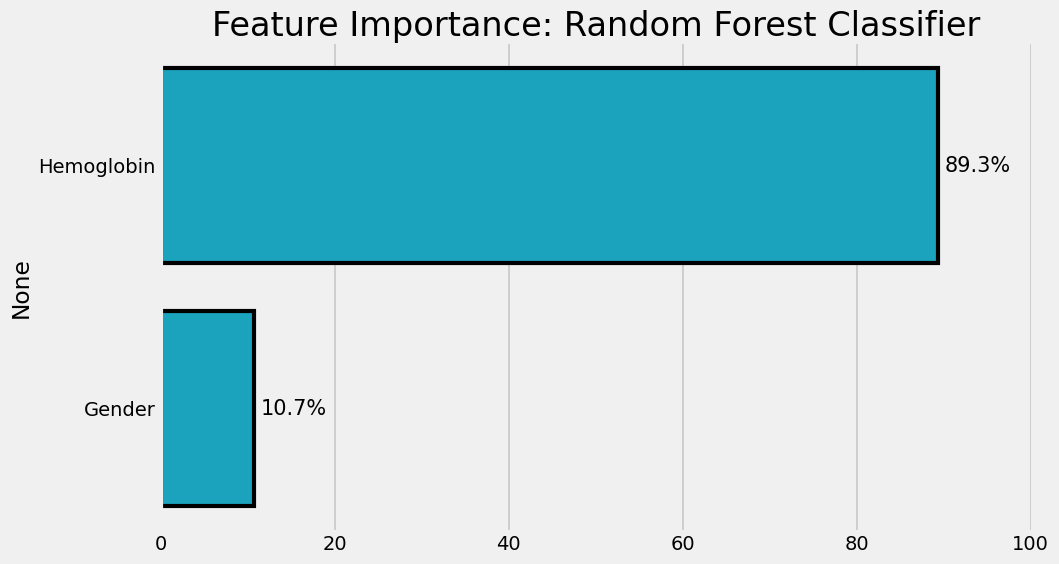

In [ ]:
feature_importance = pd.Series(data=red_model.feature_importances_, index=X_new.columns).sort_values(ascending=False) * 100

feature_importance = feature_importance.round(1)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y=feature_importance.index, x=feature_importance.values, ax=ax, color=colors[2], linewidth=3, edgecolor="black")
ax.bar_label(ax.containers[0], color="black", fontsize=15, padding=5, fmt='%g%%')

set_style(ax, left=False, bottom=True, axis_grid="x")

ax.set_title("Feature Importance: Random Forest Classifier", fontsize="xx-large")
ax.set_xlim([0, 100])

plt.show()

 the model again maintains its highest accuracy, even with only 2 features remaining.

#### Let's see how many people have anemia in the dataset. It will give an idea whether the data is balanced or imbalanced

### Categorical Feature: Gender

In [ ]:
df.groupby(['Gender','Result'])['Result'].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

### Continious Feature: Hemoglobin

In [ ]:
# See the min, max, mean values
print('The highest hemoglobin was of:',df['Hemoglobin'].max())
print('The lowest hemoglobin was of:',df['Hemoglobin'].min())
print('The average hemoglobin in the data:',df['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.412737508796623


<div class="alert alert-block alert-info"> 📌 Lower than normal hemoglobin levels indicate anemia. The normal hemoglobin range is generally defined as 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 11.6 to 15 g/dL for women.</div>

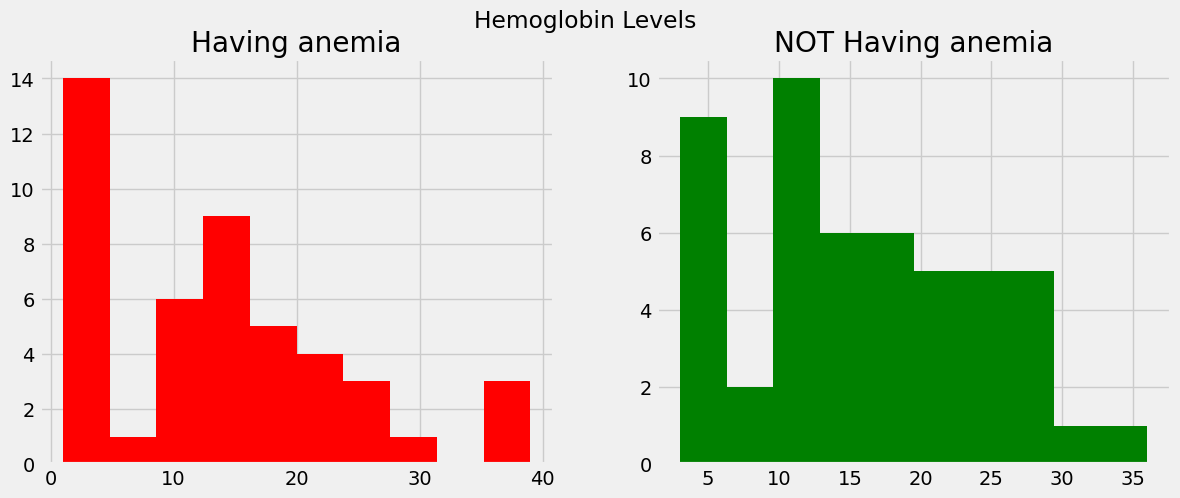

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=df[df['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=df[df['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

In [ ]:
import plotly.express as px

# Count the occurrences of each anemia status
status_counts = df['Anemia Status'].value_counts()

# Create a pie chart
fig = px.pie(names=status_counts.index, values=status_counts.values,
             title='Proportion of Individuals with and without Anemia')

# Show the plot
fig.show()


### Continious Feature: MCH (Mean Corpuscular Hemoglobin)

In [ ]:
# See the min, max, mean values
print('The highest MCH was of:',df['MCH'].max())
print('The lowest MCH was of:',df['MCH'].min())
print('The average MCH in the data:',df['MCH'].mean())

The highest MCH was of: 30.0
The lowest MCH was of: 16.0
The average MCH in the data: 22.90562983814215


<div class="alert alert-block alert-info"> 📌 MCH stands for “mean corpuscular hemoglobin.” An MCH value refers to the average quantity of hemoglobin present in a single red blood cell. Hemoglobin is the protein in your red blood cells that transports oxygen to the tissues of your body</div>

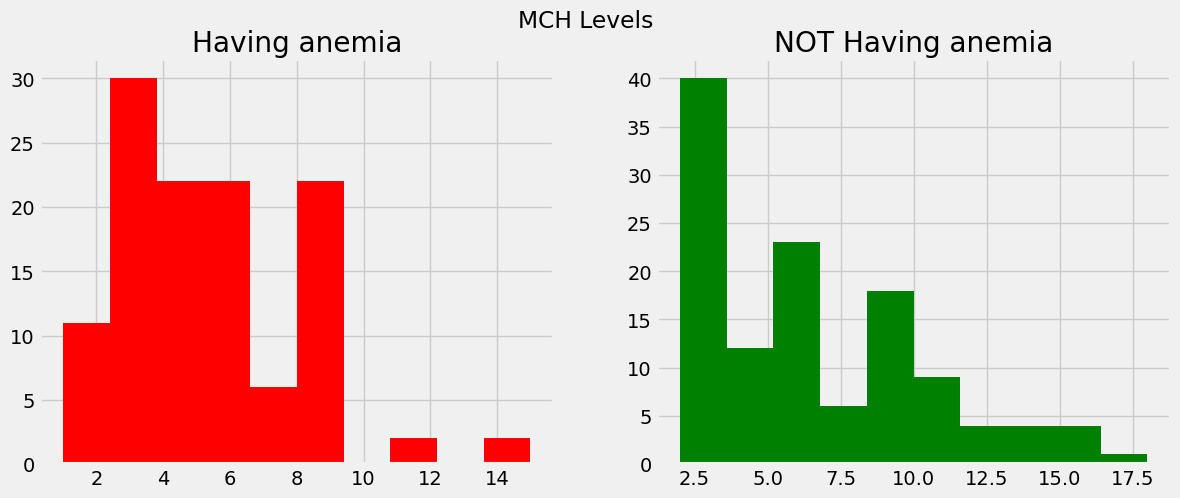

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=df[df['Result']==1]['MCH'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=df[df['Result']==0]['MCH'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCH Levels')
plt.show()

### Continious Feature: MCHC (Mean Corpuscular Hemoglobin Concentration)

In [ ]:
# See the min, max, mean values
print('The highest MCHC was of:',df['MCHC'].max())
print('The lowest MCHC was of:',df['MCHC'].min())
print('The average MCHC in the data:',df['MCHC'].mean())

The highest MCHC was of: 32.5
The lowest MCHC was of: 27.8
The average MCHC in the data: 30.251231527093594


<div class="alert alert-block alert-info"> 📌 A similar measure to MCH is something doctors call "mean corpuscular hemoglobin concentration" (MCHC). MCHC checks the average amount of hemoglobin in a group of red blood cells.</div>

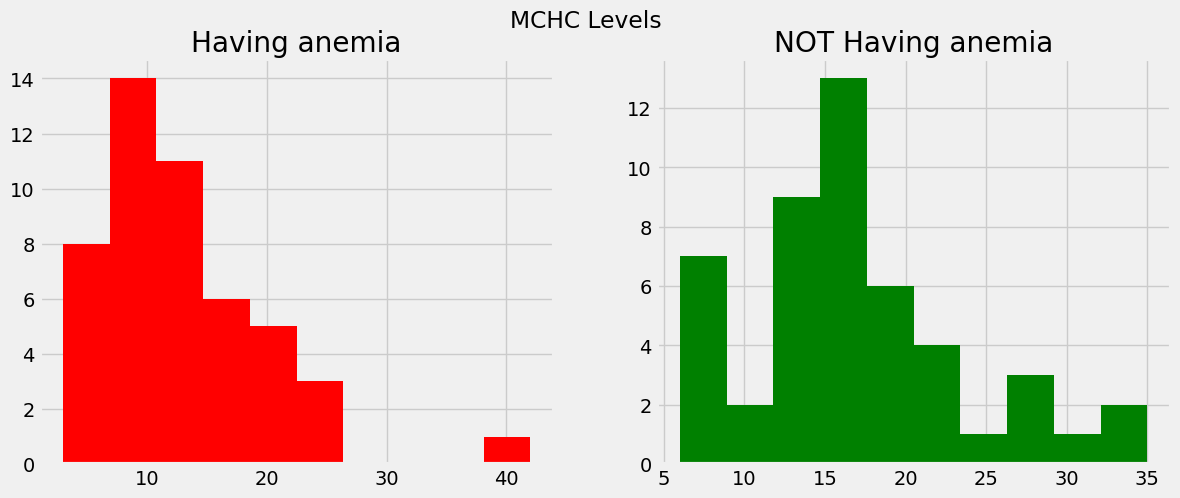

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=df[df['Result']==1]['MCHC'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=df[df['Result']==0]['MCHC'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCHC Levels')
plt.show()

### Continious Feature: MCV (Mean Corpuscular Volume)

In [ ]:
# See the min, max, mean values
print('The highest MCV was of:',df['MCV'].max())
print('The lowest MCV was of:',df['MCV'].min())
print('The average MCV in the data:',df['MCV'].mean())

The highest MCV was of: 101.6
The lowest MCV was of: 69.4
The average MCV in the data: 85.5237860661506


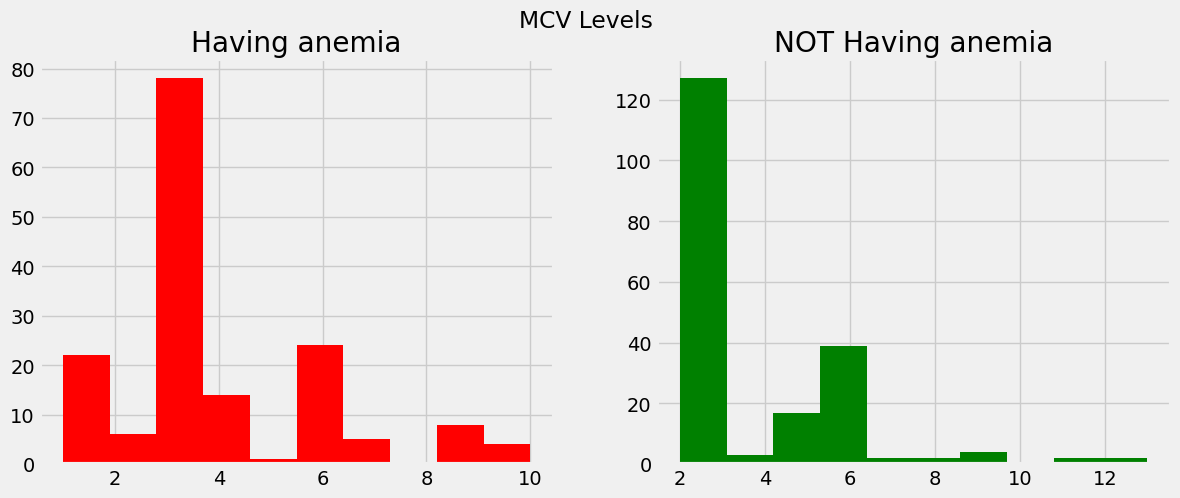

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=df[df['Result']==1]['MCV'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=df[df['Result']==0]['MCV'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCV Levels')
plt.show()

# 2. Feature Engineering and Data Cleaning

We need to convert the continous values into categorical values by either Binning or Normalisation. Binning and normalisation both will be used in this section i.e group a range of ages into a single bin or assign them a single value.

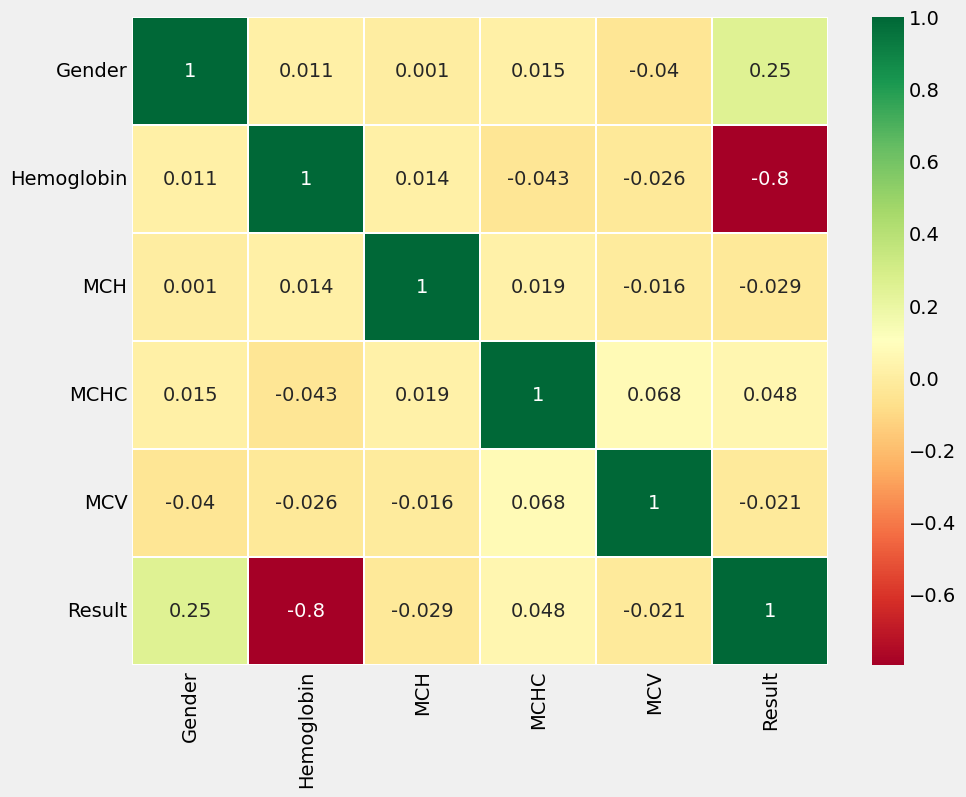

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(df.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Hemoglobin", "MCH", "MCHC", "MCV"])
scaled_df.head()

,Hemoglobin,MCH,MCHC,MCV
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669


# 3. Predictive Modelling

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

#### Splitting the data into test and train sets

In [ ]:
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Result'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=df[df.columns[:-1]]
Y=df['Result']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(994, 994, 427, 427)

#### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 1.0


#### Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 1.0


#### K-Nearest Neighbours(KNN)

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8899297423887588


#### Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.955503512880562


#### Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 1.0


### Cross Validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.994366,0.008213
Radial Svm,0.902191,0.019214
Logistic Regression,0.991554,0.007586
KNN,0.900079,0.028450
Decision Tree,1.000000,0.000000
Naive Bayes,0.938782,0.023560
Random Forest,1.000000,0.000000


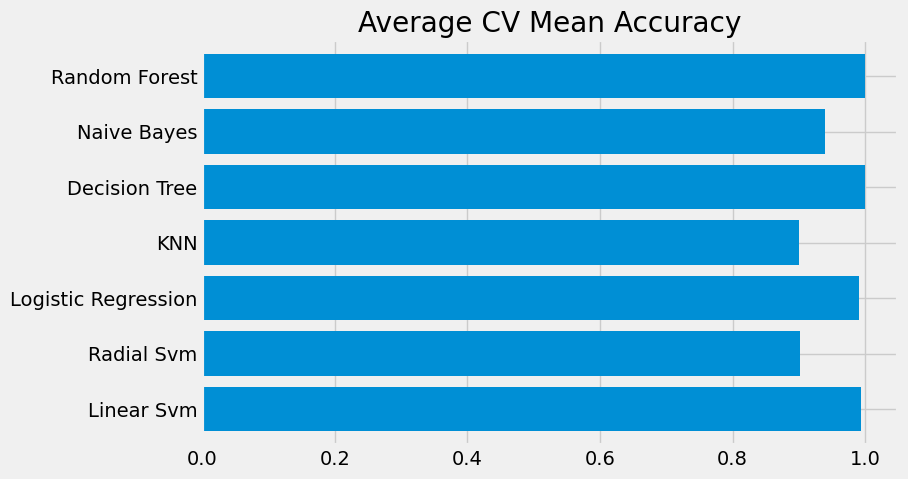

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('RF',RandomForestClassifier(n_estimators=100)),
                                              ('NB',GaussianNB())

                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

The accuracy for ensembled model is: 1.0
The cross validated score is : 0.995774647887324
